# Spam message classification
Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector

Machines to identify spam messages

## About Dataset (from kaggle)
### Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [2]:
data = pd.read_csv("/content/spam.csv", encoding = "latin1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
col = data.columns

In [5]:
col

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data = data.drop(labels = {'Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'}, axis = 1)

In [7]:
data = data.sample(frac = 1, random_state = 42)

In [8]:
!pip install colorama

In [9]:
import random
from colorama import Fore
og = Fore.BLACK
for i in range(0, 9):
  n = random.randint(0, 5571)
  if data.v1[n] == "ham":
    label_c = Fore.GREEN
  else:
    label_c = Fore.RED
  print(f"{og}label: {label_c}{data.v1[n]} \n{og}message: {label_c}{data.v2[n]}{data.v2[n]}\n")

label: ham 
message: hows my favourite person today? r u workin hard? couldn't sleep again last nite nearly rang u at 4.30hows my favourite person today? r u workin hard? couldn't sleep again last nite nearly rang u at 4.30

label: ham 
message: I only haf msn. It's yijue@hotmail.comI only haf msn. It's yijue@hotmail.com

label: spam 
message: Someonone you know is trying to contact you via our dating service! To find out who it could be call from your mobile or landline 09064015307 BOX334SK38ch Someonone you know is trying to contact you via our dating service! To find out who it could be call from your mobile or landline 09064015307 BOX334SK38ch 

label: ham 
message: Congratulations ore mo owo re wa. Enjoy it and i wish you many happy moments to and fro wherever you goCongratulations ore mo owo re wa. Enjoy it and i wish you many happy moments to and fro wherever you go

label: ham 
message: Lol yep did that yesterday. Already got my fireplace. Now its just another icon sitting ther

In [10]:
data['v1'] = data['v1'].replace({'ham' : 0, 'spam' : 1})

In [11]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(data.v2, data.v1 , test_size = 0.2, random_state = 42)

In [12]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(4457, 4457, 1115, 1115)

In [13]:
train_sentences[:10]

540     from www.Applausestore.com MonthlySubscription...
250          Ranjith cal drpd Deeraj and deepak 5min hold
1737    I cant pick the phone right now. Pls send a me...
4832    New Mobiles from 2004, MUST GO! Txt: NOKIA to ...
2548    Honestly i've just made a lovely cup of tea an...
4469    Lemme know when I can swing by and pick up, I'...
3413                              No pic. Please re-send.
1342               Yeah I'll try to scrounge something up
304     SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...
4500                                So wat's da decision?
Name: v2, dtype: object

In [37]:
train_sentences.shape, train_labels.shape

((4457, 1), (4457, 1))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

baseline_model = Pipeline([
    ("vectorizor", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
baseline_model.fit(train_sentences, train_labels)

Pipeline(steps=[('vectorizor', TfidfVectorizer()), ('clf', MultinomialNB())])

In [15]:
baseline_score = baseline_model.score(val_sentences, val_labels)*100
baseline_score

95.60538116591928

## Creation of RNN

In [16]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens = 10000,
                                    output_mode = 'int',
                                    output_sequence_length = 15)
text_vectorizer.adapt(train_sentences)

In [17]:
text_vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'i', 'to', 'you']

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras import layers

In [20]:
train_labels

540     1
250     0
1737    0
4832    1
2548    0
       ..
1008    0
2660    0
784     0
1636    0
1543    1
Name: v1, Length: 4457, dtype: int64

In [21]:
embedding = layers.Embedding(input_dim = 10000,
                             output_dim = 128,
                             input_length = 15)
embedding

In [22]:
random_sentence = random.choice(train_sentences)
embedding(text_vectorizer([random_sentence]))

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02329403, -0.04987318, -0.03624194, ...,  0.00835295,
          0.03336965,  0.00388217],
        [-0.01136891, -0.01137538,  0.02731324, ...,  0.00608677,
         -0.04224816, -0.04161959],
        [-0.00646549,  0.04184235, -0.02914589, ...,  0.04087188,
          0.02807994,  0.04644281],
        ...,
        [-0.03443002, -0.00628436, -0.02681097, ...,  0.01145449,
         -0.02196038, -0.02362032],
        [-0.03443002, -0.00628436, -0.02681097, ...,  0.01145449,
         -0.02196038, -0.02362032],
        [-0.03443002, -0.00628436, -0.02681097, ...,  0.01145449,
         -0.02196038, -0.02362032]]], dtype=float32)>

In [23]:
#train_labels = tf.cast(tf.constant(train_labels), dtype=tf.float32)

In [24]:
train_labels = pd.DataFrame(train_labels)
train_sentences = pd.DataFrame(train_sentences)
train_sentences

,v2
540,from www.Applausestore.com MonthlySubscription...
250,Ranjith cal drpd Deeraj and deepak 5min hold
1737,I cant pick the phone right now. Pls send a me...
4832,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."
2548,Honestly i've just made a lovely cup of tea an...
...,...
1008,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
2660,Want to finally have lunch today?
784,Dont think so. It turns off like randomlly wit...
1636,"No shit, but I wasn't that surprised, so I wen..."


In [25]:
from tensorflow.keras import layers
import tensorflow as tf
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)

x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

In [26]:
# train_sentences.shape, tf.reshape(train_labels, (4457, ))

In [27]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 10,
                              validation_data = (val_sentences, val_labels))

Epoch 1/10
140/140 [==============================] - 5s 27ms/step - loss: 0.4175 - accuracy: 0.8856 - val_loss: 0.2423 - val_accuracy: 0.8960
Epoch 2/10
140/140 [==============================] - 3s 20ms/step - loss: 0.1578 - accuracy: 0.9500 - val_loss: 0.1444 - val_accuracy: 0.9507
Epoch 3/10
140/140 [==============================] - 3s 20ms/step - loss: 0.0945 - accuracy: 0.9751 - val_loss: 0.1094 - val_accuracy: 0.9641
Epoch 4/10
140/140 [==============================] - 4s 32ms/step - loss: 0.0673 - accuracy: 0.9836 - val_loss: 0.0935 - val_accuracy: 0.9677
Epoch 5/10
140/140 [==============================] - 5s 37ms/step - loss: 0.0512 - accuracy: 0.9883 - val_loss: 0.0841 - val_accuracy: 0.9713
Epoch 6/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0401 - accuracy: 0.9901 - val_loss: 0.0785 - val_accuracy: 0.9731
Epoch 7/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0321 - accuracy: 0.9919 - val_loss: 0.0755 - val_accuracy: 0.9740

## Evaluation of the models(most accurate majorly)

In [28]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

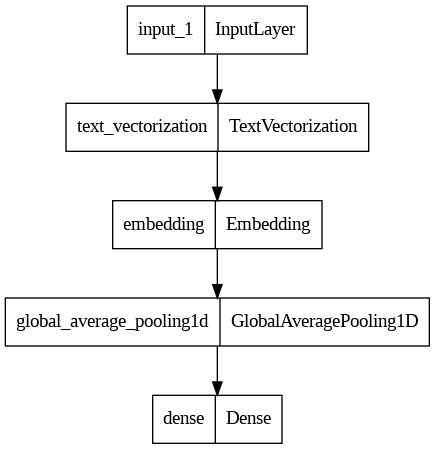

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model_1)

In [30]:
RNNA = model_1.evaluate(val_sentences, val_labels)[1]*100

35/35 [==============================] - 0s 4ms/step - loss: 0.0727 - accuracy: 0.9731


Text(0, 0.5, 'Accuracy')

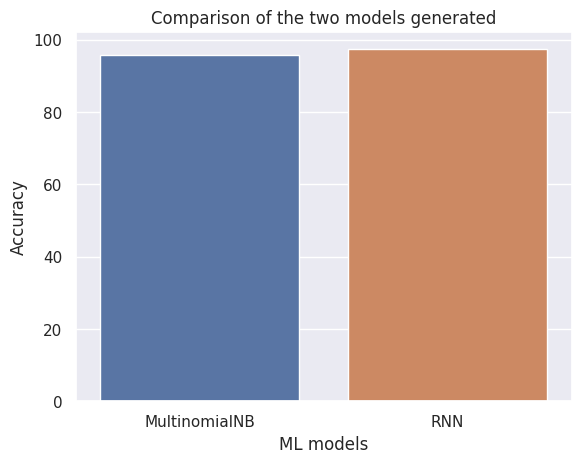

In [31]:
sns.set_theme()
sns.barplot(x = ['MultinomialNB', 'RNN'], y = [baseline_score, RNNA])
plt.title("Comparison of the two models generated")
plt.xlabel("ML models")
plt.ylabel("Accuracy")

In [32]:
pred = model_1.predict(val_sentences)
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0

35/35 [==============================] - 0s 5ms/step


In [33]:
accuracy = accuracy_score(y_true = val_labels, y_pred = pred)
precision = precision_score(y_true = val_labels, y_pred = pred)
recall = recall_score(y_true = val_labels, y_pred = pred)
f1 = f1_score(y_true = val_labels, y_pred = pred)

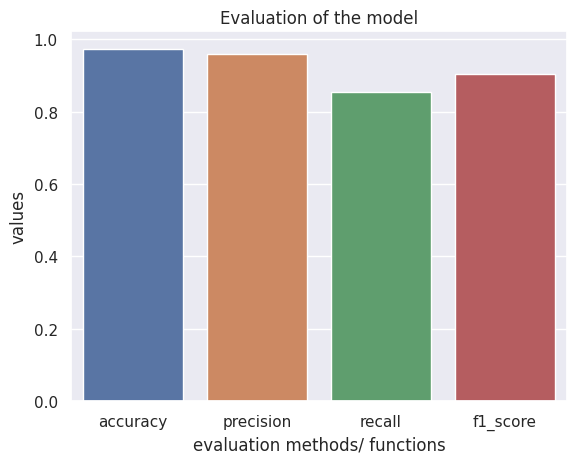

In [34]:
sns.barplot(y = [accuracy, precision, recall, f1], x = ['accuracy', 'precision', 'recall', 'f1_score'])
plt.title("Evaluation of the model")
plt.xlabel("evaluation methods/ functions")
plt.ylabel("values");

In [35]:
cfm = confusion_matrix(y_true = val_labels, y_pred = pred)

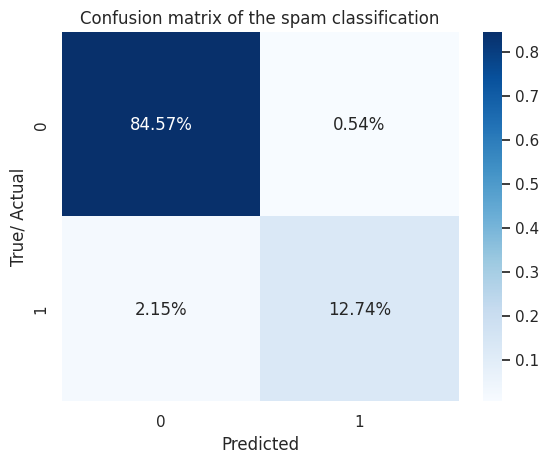

In [36]:
sns.heatmap(cfm/np.sum(cfm),fmt = '0.2%', annot = True, cmap = 'Blues')
plt.title("Confusion matrix of the spam classification")
plt.xlabel("Predicted")
plt.ylabel('True/ Actual');